<a href="https://colab.research.google.com/github/Malinovskiy159/web/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
path = "/content/gdrive/MyDrive/datasets/Impact_of_Remote_Work_on_Mental_Health.csv"
data = pd.read_csv(path, sep = ",")

In [5]:
data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [6]:
data.shape

(5000, 20)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [8]:
data.describe().round(2)

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.0,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,41.0,17.81,39.61,7.56,2.98,2.99,3.01
std,11.3,10.02,11.86,4.64,1.41,1.39,1.40
min,22.0,1.00,20.00,0.00,1.00,1.00,1.00
25%,31.0,9.00,29.00,4.00,2.00,2.00,2.00
50%,41.0,18.00,40.00,8.00,3.00,3.00,3.00
75%,51.0,26.00,50.00,12.00,4.00,4.00,4.00
max,60.0,35.00,60.00,15.00,5.00,5.00,5.00


In [9]:
data.duplicated().sum()

0

In [10]:
corr=data.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
Age,1.000000,-0.004480,-0.001352,0.003617,0.017697,-0.024992,0.023673
Years_of_Experience,-0.004480,1.000000,-0.018537,0.019043,0.001698,0.001691,0.007240
Hours_Worked_Per_Week,-0.001352,-0.018537,1.000000,-0.004609,0.000820,-0.005006,0.005293
Number_of_Virtual_Meetings,0.003617,0.019043,-0.004609,1.000000,0.007285,-0.000206,-0.004373
Work_Life_Balance_Rating,0.017697,0.001698,0.000820,0.007285,1.000000,-0.004626,-0.012913
Social_Isolation_Rating,-0.024992,0.001691,-0.005006,-0.000206,-0.004626,1.000000,0.017659
Company_Support_for_Remote_Work,0.023673,0.007240,0.005293,-0.004373,-0.012913,0.017659,1.000000


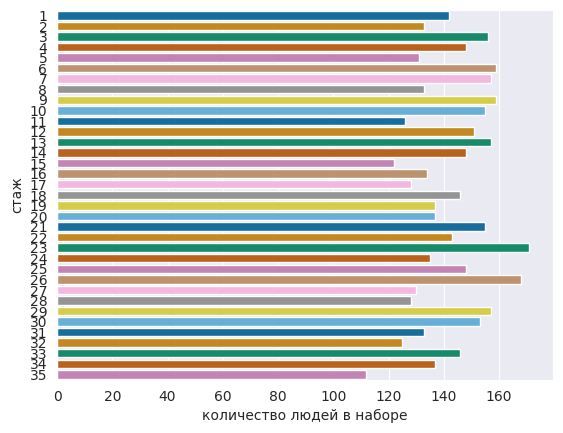

In [11]:
sns.set_style('darkgrid')
sns.countplot(y='Years_of_Experience',data=data,palette='colorblind')
plt.xlabel('количество людей в наборе')
plt.ylabel('стаж')
plt.show()

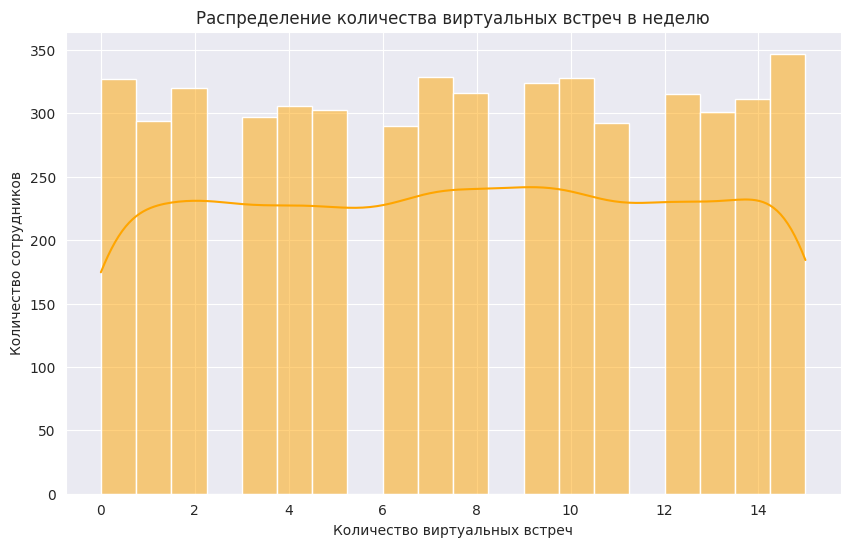

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Number_of_Virtual_Meetings'], bins=20, kde=True, color='orange')
plt.title('Распределение количества виртуальных встреч в неделю')
plt.xlabel('Количество виртуальных встреч')
plt.ylabel('Количество сотрудников')
plt.show()

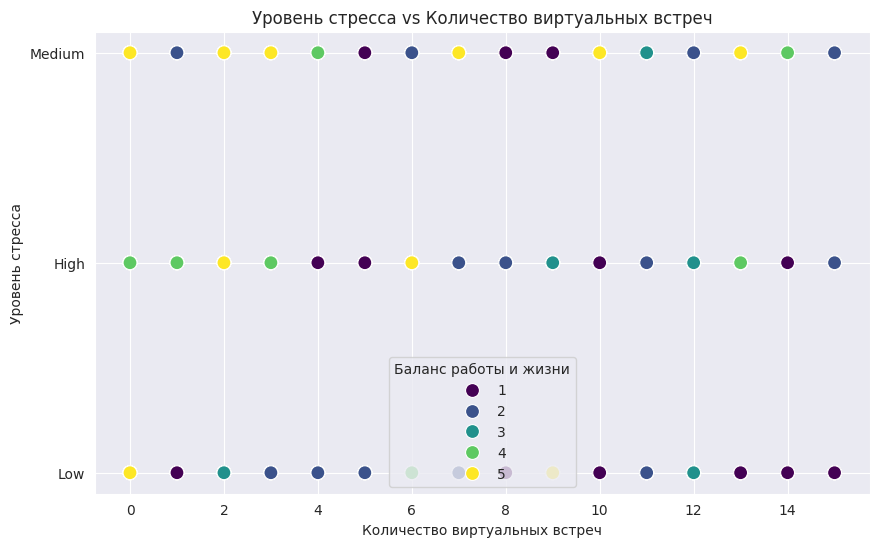

In [13]:
# 4. Диаграмма рассеяния: уровень стресса vs количество виртуальных встреч
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Number_of_Virtual_Meetings', y='Stress_Level', hue='Work_Life_Balance_Rating', palette='viridis', s=100)
plt.title('Уровень стресса vs Количество виртуальных встреч')
plt.xlabel('Количество виртуальных встреч')
plt.ylabel('Уровень стресса')
plt.legend(title='Баланс работы и жизни')
plt.show()

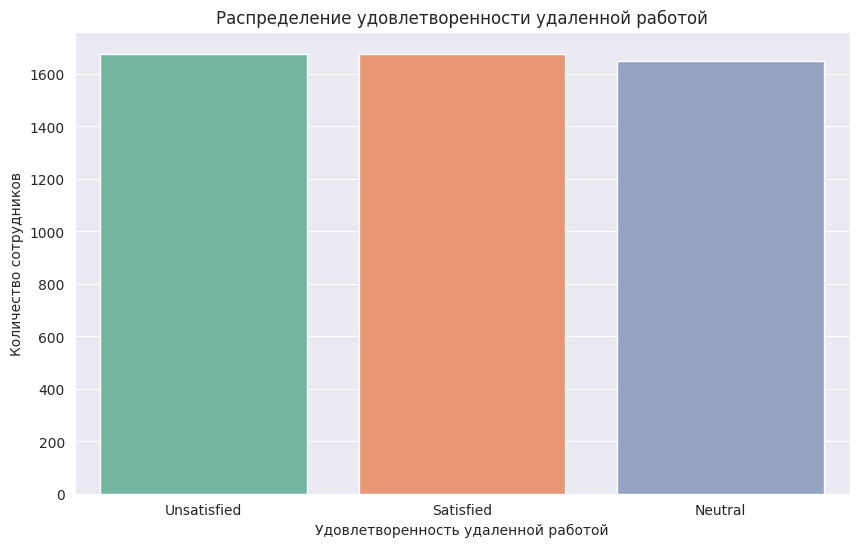

In [14]:
# 5. Гистограмма удовлетворенности удаленной работой
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Satisfaction_with_Remote_Work', palette='Set2')
plt.title('Распределение удовлетворенности удаленной работой')
plt.xlabel('Удовлетворенность удаленной работой')
plt.ylabel('Количество сотрудников')
plt.show()

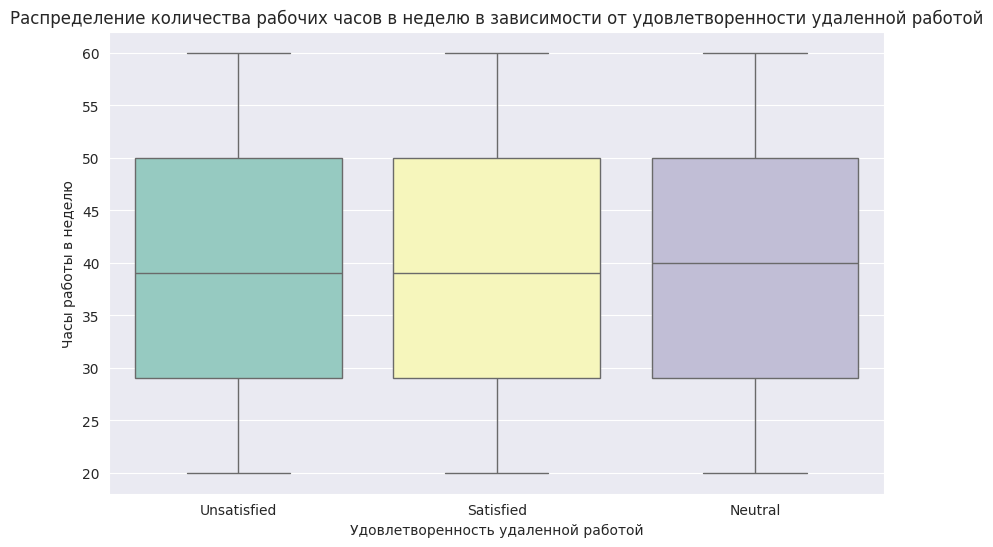

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Satisfaction_with_Remote_Work', y='Hours_Worked_Per_Week', palette='Set3')
plt.title('Распределение количества рабочих часов в неделю в зависимости от удовлетворенности удаленной работой')
plt.xlabel('Удовлетворенность удаленной работой')
plt.ylabel('Часы работы в неделю')
plt.show()
